## Neural network with one hidden layer from scratch

In [646]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data



In [647]:
# Generate data
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y
X, Y = load_planar_dataset()

### Data shape

In [648]:
print("X shape", X.shape)
print("Y shape", Y.shape)

X shape (2, 400)
Y shape (1, 400)


## Plot the data
It's always good to have a better look at your data

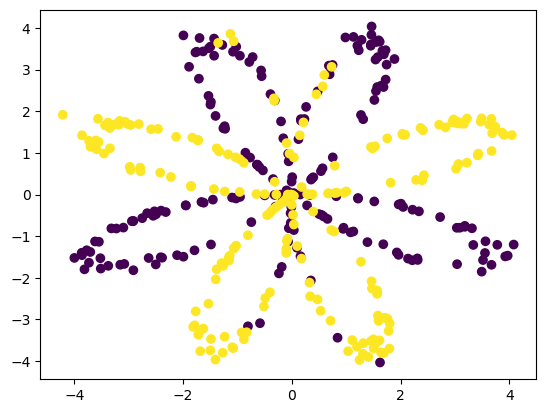

In [649]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y);

## Split the data into train and test set

In [650]:
my_seed = 22521176
X_train, X_test, y_train, y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=my_seed)

X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

X_train shape (2, 320)
y_train shape (1, 320)


In [651]:
def layer_size(X: np.ndarray, Y:np.ndarray, n_hidden): 
    n_input, m = X.shape
    n_y = Y.shape[0]
    return n_input, n_hidden, n_y

In [652]:
def initialize_parameters(n_input, n_hidden, n_y, seed):
    np.random.seed(seed)
    
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    W2 = np.random.randn(n_y, n_hidden) * 0.01
    
    b1 = np.zeros(shape=(n_hidden, 1))
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {
        "W1": W1,
        "W2": W2,
        "b1": b1,
        "b2": b2,
    }
    return parameters

In [653]:
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

In [654]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    logprobs = (Y*np.log(A2) + (1 - Y)*np.log(1 - A2))
    cost = -np.sum(logprobs)/m
    
    
    # YOUR CODE ENDS HERE
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [655]:
def forward_propagation(X, W1, W2, b1, b2): 
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    return A1, A2

In [656]:
def backpropagation(X, y, W1, W2, b1, b2, A1, A2): 
    m = X.shape[1]
    
    
    dz2 = A2 - y
    dW2 = np.dot(dz2, A1.T)/m
    db2 = np.sum(dz2, axis=1, keepdims=True)/m
    dz1 = np.dot(W2.T, dz2) * (1-A1**2)
    dW1 = np.dot(dz1, X.T)/m
    db1 = np.sum(dz1, axis=1, keepdims=True)/m
    
    return dW1, dW2, db1, db2

In [657]:
def predict(X, W1, W2, b1, b2): 
    A1, A2 = forward_propagation(X, W1, W2, b1, b2)
    return A2 > 0.5

In [658]:
costs = []

def nn_model(X, y, learning_rate, iter_num=10000, n_hidden=4): 
    n_input, n_hidden, n_y = layer_size(X, y, n_hidden)
    parameters = initialize_parameters(n_input, n_hidden, n_y, seed=my_seed)
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    for i in range(iter_num): 
        A1, A2 = forward_propagation(X, W1, W2, b1, b2)
        dW1, dW2, db1, db2 = backpropagation(X, y, W1, W2, b1, b2, A1, A2)
        W1 = W1 - learning_rate * dW1
        W2 = W2 - learning_rate * dW2
        b1 = b1 - learning_rate * db1
        b2 = b2 - learning_rate * db2
        if i % 100 == 0: 
            
            cost = compute_cost(A2, y)
            costs.append(cost)
    return W1, W2, b1, b2

In [659]:
size = X_train.shape[1]
W1, W2, b1, b2 = nn_model(X_train[:, :size], y_train[:, :size], learning_rate=1.2, iter_num=100000)
predictions = predict(X_train, W1, W2, b1, b2)
print ('Accuracy: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T)) / float(y_train.size) * 100) + '%')
predictions = predict(X_test, W1, W2, b1, b2)
print ('Accuracy: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T)) / float(y_test.size) * 100) + '%')

Accuracy: 90%
Accuracy: 87%


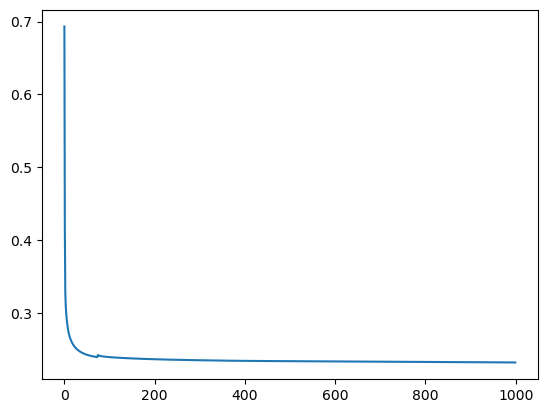

In [660]:
plt.plot(costs)

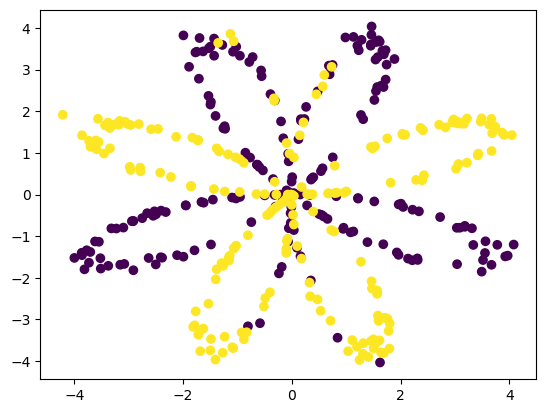

In [661]:
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y)

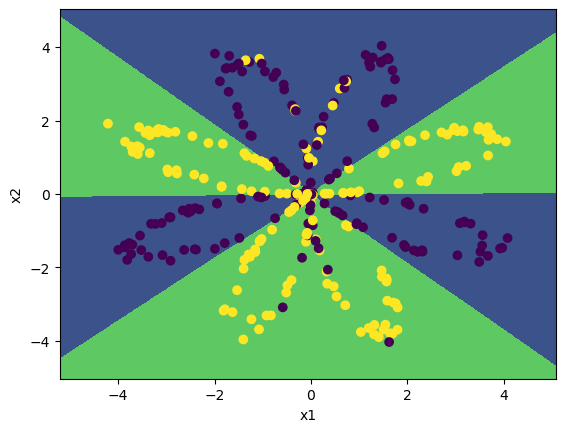

In [662]:
def plot_decision_boundary(model, X, y): 
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_ = np.stack((xx.ravel(), yy.ravel()))
    Z = model(X_).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y)
    
    
plot_decision_boundary(lambda X: predict(X, W1, W2, b1, b2) , X_train, y_train)
    

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 66.25 %
Accuracy for 3 hidden units: 90.0 %
Accuracy for 4 hidden units: 89.75 %
Accuracy for 5 hidden units: 89.25 %


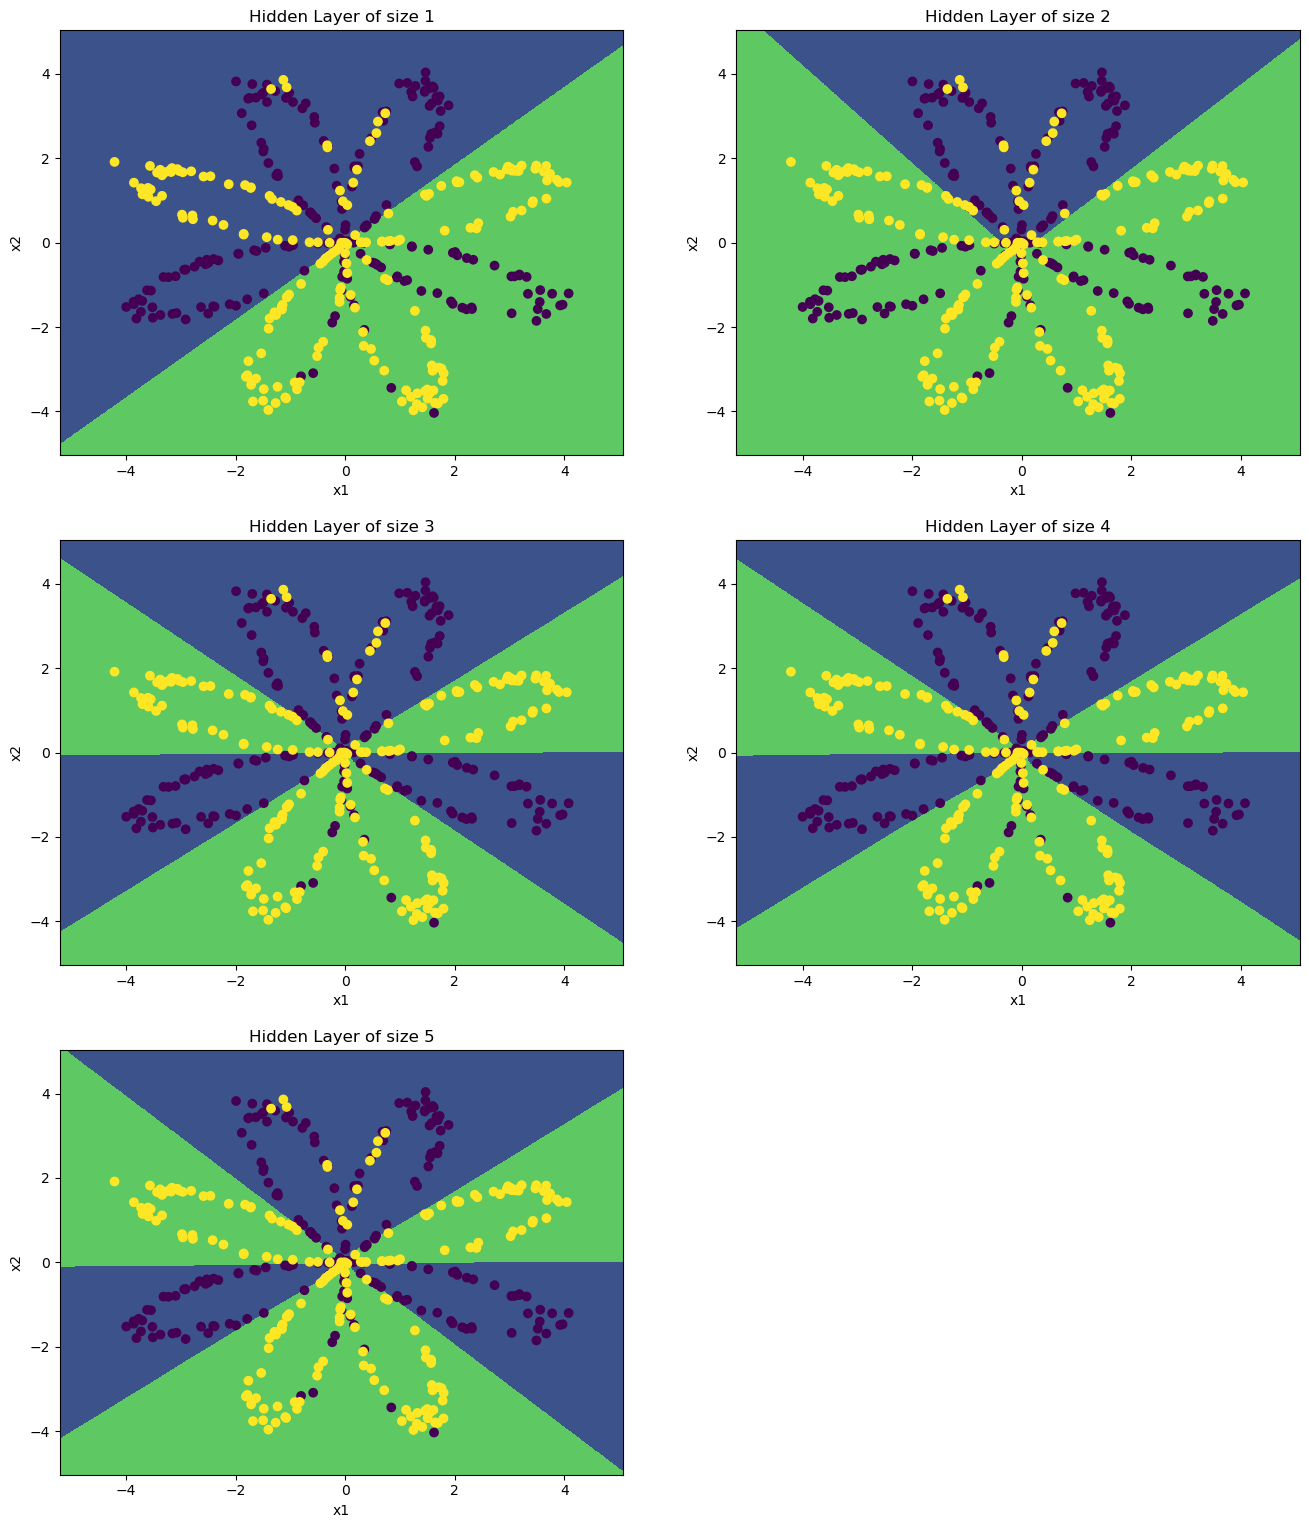

In [667]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

# you can try with different hidden layer sizes
# but make sure before you submit the assignment it is set as "hidden_layer_sizes = [1, 2, 3, 4, 5]"
# hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    W1, W2, b1, b2 = nn_model(X_train, y_train, learning_rate=1.2, iter_num = 5000, n_hidden=n_h)
    plot_decision_boundary(lambda x: predict(x, W1, W2, b1, b2), X, Y)
    predictions = predict(X, W1, W2, b1, b2)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))